# Cell 1 - Install (run once in a fresh environment / Colab)
# (uncomment to run)
# !pip install pandas numpy matplotlib seaborn missingno scikit-learn xgboost lightgbm catboost shap optuna joblib flask streamlit


In [1]:
# Cell 2 - Imports + load dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

PATH = "D:/Internship/Unified Mentor/OCD patient/ocd_project/data/OCD Patient Dataset_ Demographics & Clinical Data.csv"
df = pd.read_csv(PATH)
df.columns = df.columns.str.strip()        # trim column names
df.head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [2]:
# Cell 3 - Quick info & missing values
print("Rows, cols:", df.shape)
display(df.info())
display(df.isnull().sum().sort_values(ascending=False))
# quick stats
display(df.describe(include='all').T)


Rows, cols: (1500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non

None

Medications                      386
Previous Diagnoses               248
Patient ID                         0
Ethnicity                          0
Age                                0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Gender                             0
Duration of Symptoms (months)      0
Family History of OCD              0
Compulsion Type                    0
Obsession Type                     0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient ID,1500.0,NaN,NaN,NaN,5541.254,2562.389469,1017.0,3338.0,5539.5,7745.5,9995.0
Age,1500.0,NaN,NaN,NaN,46.781333,16.830321,18.0,32.0,47.0,61.0,75.0
Gender,1500,2,Male,753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,1500,4,Caucasian,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,1500,3,Single,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Level,1500,4,Some College,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCD Diagnosis Date,1500,1218,2017-06-21,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration of Symptoms (months),1500.0,NaN,NaN,NaN,121.745333,67.40461,6.0,64.0,121.0,178.0,240.0
Previous Diagnoses,1252,4,MDD,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family History of OCD,1500,2,Yes,760,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

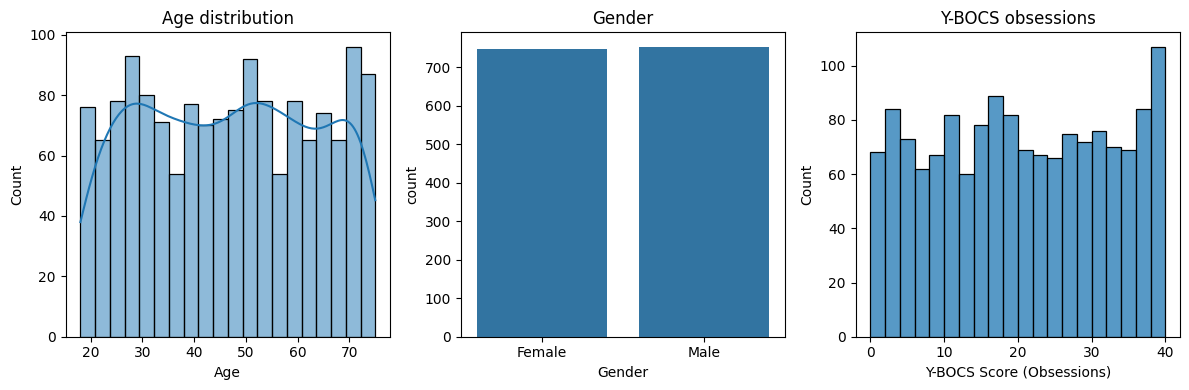

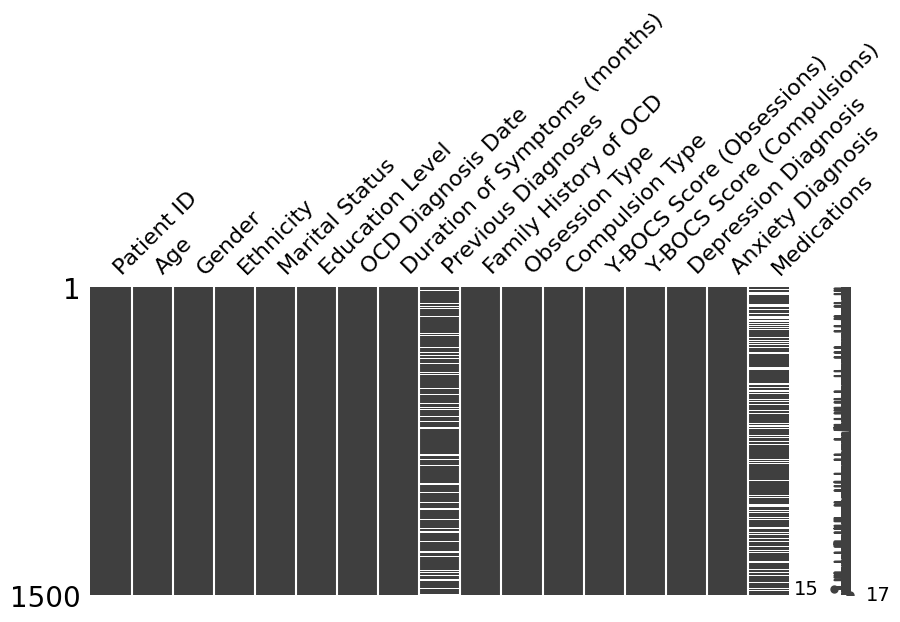

In [3]:
# Cell 4 - Basic EDA (age, gender, Y-BOCS)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df['Age'].dropna(), bins=20, kde=True).set_title('Age distribution')
plt.subplot(1,3,2)
sns.countplot(x='Gender', data=df).set_title('Gender')
plt.subplot(1,3,3)
sns.histplot(df['Y-BOCS Score (Obsessions)'].dropna(), bins=20).set_title('Y-BOCS obsessions')
plt.tight_layout()
# missingness map
msno.matrix(df, figsize=(10,4))


In [4]:
# Cell 5 - Simple cleaning: parse date, trim spaces
if 'OCD Diagnosis Date' in df.columns:
    df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'], errors='coerce')

# strip string columns
for c in df.select_dtypes('object').columns:
    df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})
    
# show sample rows with missing meds
df[df['Medications'].isna()].head()


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
8,9039,36,Male,Hispanic,Divorced,College Degree,2016-09-19,84,NaN,No,Harm-related,Praying,37,24,No,Yes,NaN
10,9672,21,Female,African,Married,College Degree,2014-12-18,95,GAD,Yes,Harm-related,Checking,40,26,Yes,No,NaN
12,6237,23,Female,Hispanic,Married,High School,2015-06-09,48,Panic Disorder,No,Contamination,Praying,14,27,Yes,Yes,NaN
18,8271,50,Female,African,Single,Some College,2017-11-04,62,NaN,Yes,Hoarding,Washing,22,22,No,No,NaN


In [5]:
# Cell 6 - Decide how to treat Medications
# Option A: drop rows with Medications missing (used in the sample notebook -> ends up with ~1114 rows)
df_dropna = df.dropna(subset=['Medications']).copy()

# Option B: keep and mark as 'Unknown'
df_fill = df.copy()
df_fill['Medications'] = df_fill['Medications'].fillna('Unknown')

print("Original rows:", len(df))
print("Drop-NA rows:", len(df_dropna))
print("Fill-Unknown rows:", len(df_fill))
# We'll continue with df_dropna for modeling (like the sample), but you can switch to df_fill if you want Unknown class.
df_model = df_dropna


Original rows: 1500
Drop-NA rows: 1114
Fill-Unknown rows: 1500


In [6]:
# Cell 7 - Feature selection & small cleanup
# Drop Patient ID (identifier) and OCD Diagnosis Date (not used directly)
drop_cols = ['Patient ID']
if 'OCD Diagnosis Date' in df_model.columns:
    drop_cols.append('OCD Diagnosis Date')
df_model = df_model.drop(columns=drop_cols, errors='ignore')

# check columns
df_model.columns.tolist()


['Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis',
 'Medications']

In [7]:
# Cell 8 - Encode categorical columns
# Decide which are categorical:
cat_cols = df_model.select_dtypes(include='object').columns.tolist()
cat_cols


['Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Depression Diagnosis',
 'Anxiety Diagnosis',
 'Medications']

In [8]:
# Cell 9 - smart encoding:
# - For true ordinal (Education Level) you may map; for others use one-hot.
df_enc = df_model.copy()

# Example ordinal mapping (matches sample mappings in your PDF; adapt if labels differ)
edu_map = {'Some College':1,'College Degree':2,'High School':3,'Graduate Degree':4}
if 'Education Level' in df_enc.columns:
    df_enc['Education Level'] = df_enc['Education Level'].map(edu_map).fillna(df_enc['Education Level'])

# Fill or map boolean columns ('Yes'/'No') consistently
bin_map = {'No':0,'Yes':1}
for c in ['Family History of OCD','Depression Diagnosis','Anxiety Diagnosis']:
    if c in df_enc.columns:
        df_enc[c] = df_enc[c].map(bin_map).fillna(df_enc[c])

# Now one-hot for remaining object cols (except target)
target_col = 'Medications'
cols_to_dummify = [c for c in df_enc.select_dtypes(include='object').columns if c != target_col]
df_enc = pd.get_dummies(df_enc, columns=cols_to_dummify, drop_first=True)

# Label-encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_enc[target_col])
X = df_enc.drop(columns=[target_col])
print("X shape:", X.shape, "y shape:", y.shape)
print("Medications classes:", list(le.classes_))


X shape: (1114, 25) y shape: (1114,)
Medications classes: ['Benzodiazepine', 'SNRI', 'SSRI']


In [9]:
# Cell 10 - Train/test split & scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


In [10]:
# Cell 11 - Baseline models and CV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    'LogReg': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


for name, m in models.items():
    scores = cross_val_score(m, X_train_s, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")


LogReg CV accuracy: 0.329 +/- 0.021
RandomForest CV accuracy: 0.328 +/- 0.011


C:\Users\Gaurav Sahoo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:38:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Gaurav Sahoo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:38:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Gaurav Sahoo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:38:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Gaurav Sahoo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:38:55] WARNING: C:\actions-runner\_work\

XGBoost CV accuracy: 0.339 +/- 0.019


C:\Users\Gaurav Sahoo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:38:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test accuracy: 0.32286995515695066
                precision    recall  f1-score   support

Benzodiazepine       0.29      0.36      0.33        77
          SNRI       0.38      0.35      0.36        75
          SSRI       0.31      0.25      0.28        71

      accuracy                           0.32       223
     macro avg       0.33      0.32      0.32       223
  weighted avg       0.33      0.32      0.32       223



Text(0.5, 1.0, 'Confusion matrix')

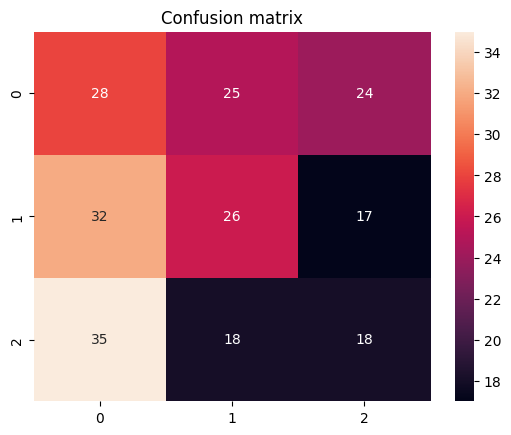

In [11]:
# Cell 12 - Fit best (example: XGBoost) and evaluate
best = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
best.fit(X_train_s, y_train)
y_pred = best.predict(X_test_s)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion matrix')


Text(0.5, 1.0, 'Top 30 feature importances')

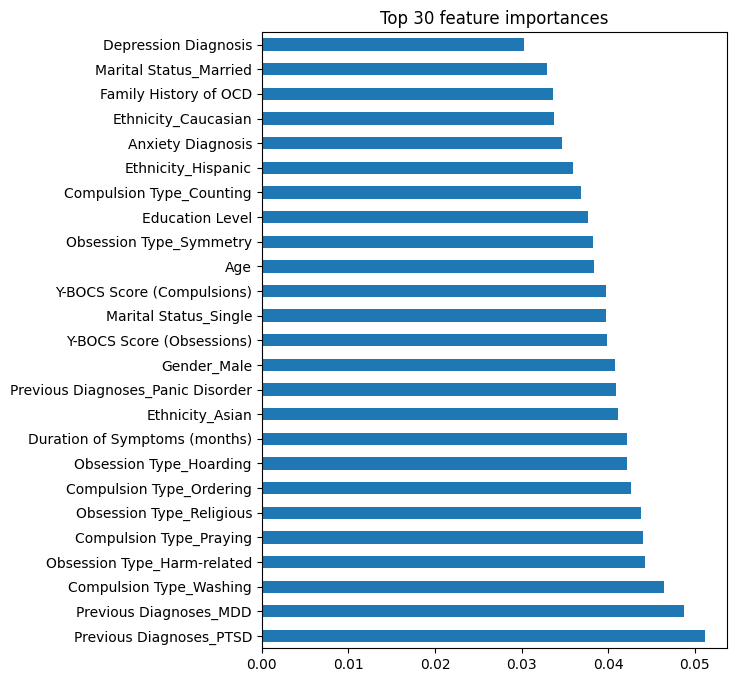

In [12]:
# Cell 13 - Feature importance
importances = best.feature_importances_
feat_names = X.columns
fi = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(30)
fi.plot(kind='barh', figsize=(6,8)); plt.title('Top 30 feature importances')


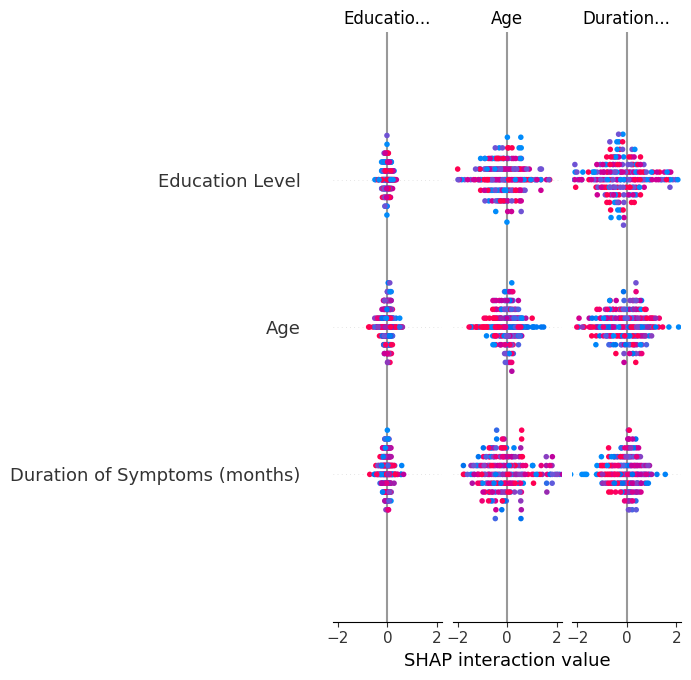

In [13]:
# Cell 14 - (Optional/advanced) SHAP explainability
# (shap may be slow; run if environment supports it)
import shap
explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(X_test_s)
# for multiclass shap.summary_plot returns a lot; here's an overall
shap.summary_plot(shap_values, X_test, feature_names=feat_names)


In [14]:
# Cell 15 - Save pipeline (model + scaler + columns + labelencoder)
import joblib
save_obj = {
    'model': best,
    'scaler': scaler,
    'columns': X.columns.tolist(),
    'label_encoder_classes': le.classes_.tolist()
}
joblib.dump(save_obj, 'ocd_med_pipeline.pkl')
print("Saved ocd_med_pipeline.pkl")


Saved ocd_med_pipeline.pkl


In [15]:
# Cell 16 - Quick prediction example using the saved pipeline
pipeline = joblib.load('ocd_med_pipeline.pkl')
def predict_single(row_dict):
    # row_dict should contain the same raw features (strings/values) as original dataset columns except target
    row = pd.DataFrame([row_dict])
    # basic cleaning like earlier
    row.columns = row.columns.str.strip()
    # same transforms (must implement same encoding logic); for simplicity: reindex to saved columns
    # NOTE: in production you should implement the same preprocessing steps as above.
    row = pd.get_dummies(row)
    row = row.reindex(columns=pipeline['columns'], fill_value=0)
    x_s = pipeline['scaler'].transform(row)
    pred = pipeline['model'].predict(x_s)
    return pipeline['label_encoder_classes'][pred[0]]

# Example (replace values to match your column names)
sample_input = {col: X.iloc[0][col] for col in X.columns[:5]}  # just to show format
print("Example predict (partial):", predict_single(sample_input))


Example predict (partial): SSRI
